In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = datasets.load_iris()   
X = iris.data 
y = iris.target

In [4]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
neighbors = np.arange(1,9) 
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [6]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train,y_train) 
    test_accuracy[i] = knn.score(X_test,y_test) 

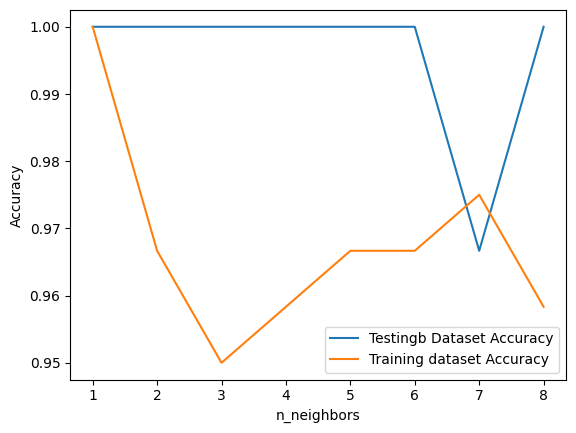

In [7]:
plt.plot(neighbors,test_accuracy, label ="Testingb Dataset Accuracy") 
plt.plot(neighbors, train_accuracy, label="Training dataset Accuracy")
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
cross_val_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [0.95833333 0.91666667 0.83333333 1.         0.95833333]


In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [11]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

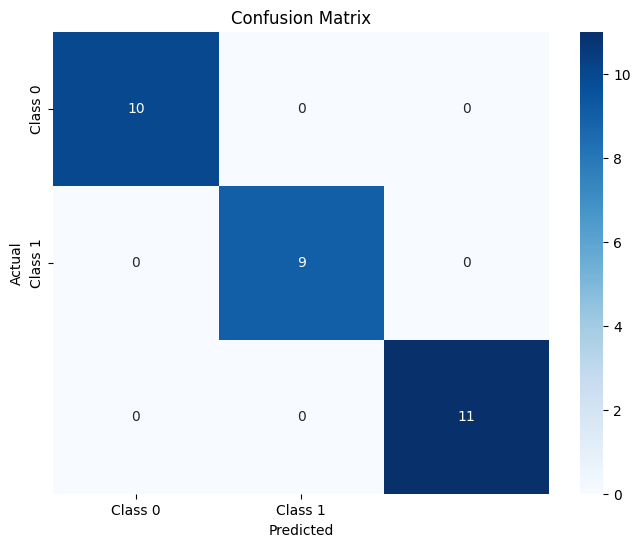

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()